In [115]:
#Import Packages
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

import sklearn
from sklearn.model_selection import train_test_split

import re
import string

import nltk
from nltk.corpus import twitter_samples
from nltk.corpus import stopwords
from nltk.tokenize import TweetTokenizer
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords

In [116]:
nltk.download('twitter_samples')
nltk.download('stopwords')

[nltk_data] Downloading package twitter_samples to
[nltk_data]     C:\Users\kryzw\AppData\Roaming\nltk_data...
[nltk_data]   Package twitter_samples is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\kryzw\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [298]:
def process_tweet(tweet):
  stemmer = PorterStemmer() 
  stopwords_english = stopwords.words('english')

  # remove the stock market tickers
  tweet = re.sub(r'\$\w*', '', tweet)

  # remove the old styles retweet text 'RT'
  tweet = re.sub(r'^RT[\s]+', '', tweet)

  # remove the hyperlinks
  tweet = re.sub(r'https?:\/\/.*[\r\n]*', '', tweet)

  # remove the # symbol
  tweet = re.sub(r'#', '', tweet)

  # Tokenize the tweet
  tokenizer = TweetTokenizer(preserve_case=False, reduce_len=True, strip_handles=True)
  tweet_tokens = tokenizer.tokenize(tweet)

  tweet_clean = []

  # removing stopwords and punctuation
  for word in tweet_tokens:
    if (word not in stopwords_english and
        word not in string.punctuation):
      stem_word = stemmer.stem(word)    #stemming
      tweet_clean.append(stem_word)

  return tweet_clean

In [299]:
# https://medium.com/@koshut.takatsuji/twitter-sentiment-analysis-with-full-code-and-explanation-naive-bayes-a380b38f036b
#cleaning data

#Import labelled training data set
df = pd.read_csv('C:/Dev_And_Apps/Twitter_Extract_app/TrainingData/TRAINING3.csv')

#chane pandas options to show full column width
pd.options.display.max_colwidth = 250
#read head of data
df.head()
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2022 entries, 0 to 2021
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    2022 non-null   object
 1   Target  2022 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 31.7+ KB


<AxesSubplot:title={'center':'Distribution of Tweet Sentiment in Labelled Data'}, xlabel='Sentiment', ylabel='# Tweets'>

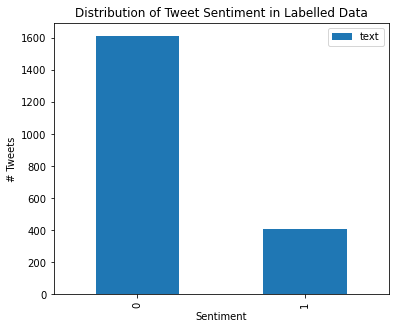

In [300]:
# general analysis of dataset
#DISTRIBUTION OF SENTIMENT
dfg = df.groupby(df['Target']).count()
dfg.plot(kind='bar', title='Distribution of Tweet Sentiment in Labelled Data',y='text', ylabel='# Tweets',
         xlabel='Sentiment', figsize=(6, 5))

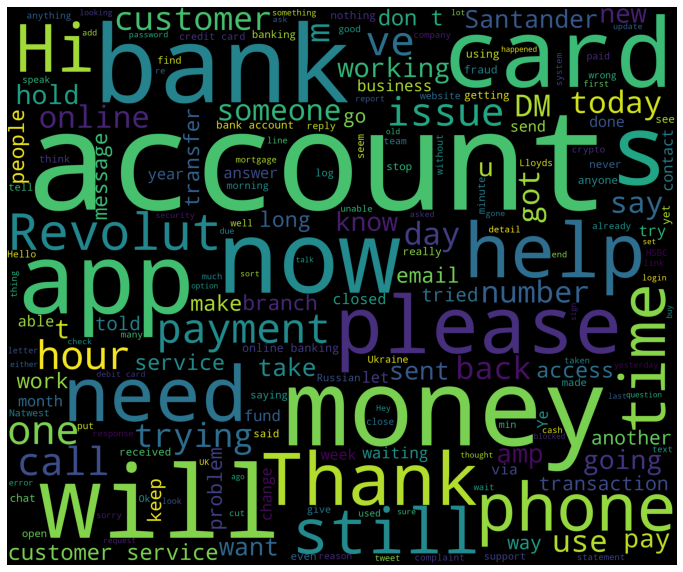

In [301]:
#Word cloud for negatiuve tweets
from wordcloud import WordCloud,STOPWORDS

dfn=df[df['Target']==0]
words = ' '.join(dfn['text'])
cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'
                            ])

wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word)

plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

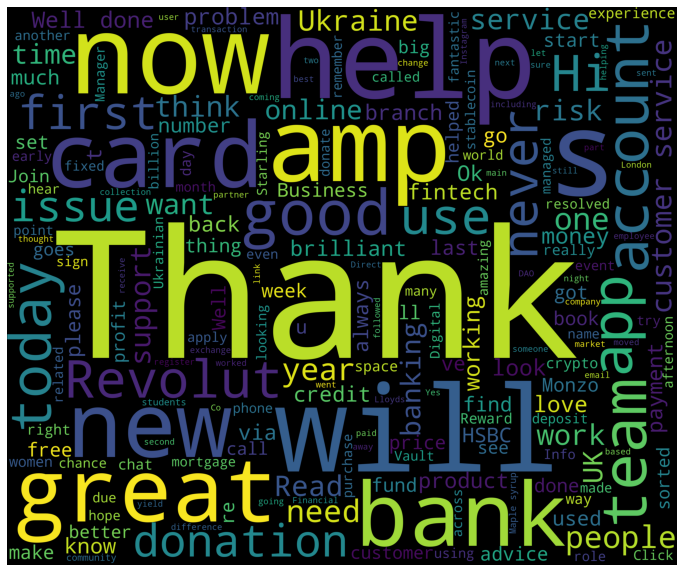

In [302]:
#Word cloud for positive tweets
from wordcloud import WordCloud,STOPWORDS

dfp=df[df['Target']==1]
words = ' '.join(dfp['text'])
cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'
                            ])

wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word)

plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [303]:
#General data cleaning

#Remove any rows with a "nan" in them
df = df.dropna(axis=0, how = 'any')

#Make it so that any non readable text gets converted into nothing
def removetext(text):
    return ''.join([i if ord(i) < 128 else '' for i in text])

#Here I am doing the actual removing
df['text'] = df['text'].apply(removetext)

In [304]:
#remove stop words
import re
import nltk
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

#remove @monzo etc
def clean_tweet_handles(raw_tweet):
    handles_only = re.sub(r"()@\w+",r"\1",raw_tweet)
    #print(handles_only)
    words = handles_only.lower().split()                             
    stops = set(stopwords.words("english"))                  
    meaningful_words = [w for w in words if not w in stops] 
    return( " ".join( meaningful_words )) 

#remove URLS
def remove_urls(raw_tweet):
    tweet = re.sub(r'(https|http)?:\/\/(\w|\.|\/|\?|\=|\&|\%)*\b', '', raw_tweet,flags=re.MULTILINE)
#     re.sub(r"http\S+|www\S+|https\S+", '', tweet, flags=re.MULTILINE
    #print(handles_only)
    words = tweet.lower().split()                             
    stops = set(stopwords.words("english"))                  
    meaningful_words = [w for w in words if not w in stops] 
    return( " ".join( meaningful_words )) 

def tweet_to_words(raw_tweet):
    letters_only = re.sub("[^a-zA-Z]", " ",raw_tweet) 
    words = letters_only.lower().split()                             
    stops = set(stopwords.words("english"))                  
    meaningful_words = [w for w in words if not w in stops] 
    return( " ".join( meaningful_words )) 

def stemming(raw_tweet):
    letters_only = re.sub("[^a-zA-Z]", " ",raw_tweet) 
    words = letters_only.lower().split()   
    stops = set(stopwords.words("english"))      
    ps = PorterStemmer()
    stemmed_words = [ps.stem(w) for w in words if not w in stops]
    return( " ".join( stemmed_words)) 
    
def lemmatizer(raw_tweet):
    letters_only = re.sub("[^a-zA-Z]", " ",raw_tweet) 
    words = letters_only.lower().split()   
    stops = set(stopwords.words("english"))      
#     ps = PorterStemmer()
#     stemmed_words = [ps.stem(w) for w in words if not w in stops]   
    lemmatizer = WordNetLemmatizer()
    lemma_words = [lemmatizer.lemmatize(w, pos='a') for w in words if not w in stops]
    return( " ".join( lemma_words)) 

#removing links

def clean_tweet_length(raw_tweet):
    letters_only = re.sub("[^a-zA-Z]", " ",raw_tweet) 
    words = letters_only.lower().split()                             
    stops = set(stopwords.words("english"))                  
    meaningful_words = [w for w in words if not w in stops] 
    return(len(meaningful_words)) 

df_clean=df
df_clean['no_handles']=df_clean['text'].apply(lambda x: clean_tweet_handles(x))
df_clean['remove_urls']=df_clean['no_handles'].apply(lambda x: remove_urls(x))
df_clean['clean_tweet']=df_clean['remove_urls'].apply(lambda x: tweet_to_words(x))
df_clean['stemmed_tweet']=df_clean['clean_tweet'].apply(lambda x: stemming(x))
df_clean['lemmatizer_tweet']=df_clean['clean_tweet'].apply(lambda x: lemmatizer(x))
df_clean['Tweet_length']=df_clean['text'].apply(lambda x: clean_tweet_length(x))

df_clean.head(2)

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\kryzw\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,text,Target,no_handles,remove_urls,clean_tweet,stemmed_tweet,lemmatizer_tweet,Tweet_length
0,"To all @RevolutApp users, grab your $SHIB now before we go to the moon. Last chance https://t.co/NH5ovmWYrM",1,"users, grab $shib go moon. last chance https://t.co/nh5ovmwyrm","users, grab $shib go moon. last chance",users grab shib go moon last chance,user grab shib go moon last chanc,users grab shib go moon last chance,12
1,@GossipShib @RevolutApp @RobinhoodApp ShibArmy Never Sleeps LFG https://t.co/mBZCqtlm9w,1,shibarmy never sleeps lfg https://t.co/mbzcqtlm9w,shibarmy never sleeps lfg,shibarmy never sleeps lfg,shibarmi never sleep lfg,shibarmy never sleeps lfg,11


In [306]:
#encoding the sentiment and label
# Import LabelEncoder
from sklearn import preprocessing
#creating labelEncoder
le = preprocessing.LabelEncoder()
# Converting string labels into numbers.
df_clean['sent_code']=le.fit_transform(df['Target'])
#df['lab_code']=le.fit_transform(df['label'])
df_clean.head(2)

,text,Target,no_handles,remove_urls,clean_tweet,stemmed_tweet,lemmatizer_tweet,Tweet_length,sent_code
0,"To all @RevolutApp users, grab your $SHIB now before we go to the moon. Last chance https://t.co/NH5ovmWYrM",1,"users, grab $shib go moon. last chance https://t.co/nh5ovmwyrm","users, grab $shib go moon. last chance",users grab shib go moon last chance,user grab shib go moon last chanc,users grab shib go moon last chance,12,1
1,@GossipShib @RevolutApp @RobinhoodApp ShibArmy Never Sleeps LFG https://t.co/mBZCqtlm9w,1,shibarmy never sleeps lfg https://t.co/mbzcqtlm9w,shibarmy never sleeps lfg,shibarmy never sleeps lfg,shibarmi never sleep lfg,shibarmy never sleeps lfg,11,1


In [307]:
#stemmed _tweet model
train,test = train_test_split(df_clean,test_size=0.2,random_state=42)
train_clean_tweet=[]
for tweet in train['lemmatizer_tweet']:
    train_clean_tweet.append(tweet)
test_clean_tweet=[]
for tweet in test['lemmatizer_tweet']:
    test_clean_tweet.append(tweet)
    
test_clean_tweet[0:2]

['walk bank business customer find cant get change business go local instead whats point banking might well open account',
 'yes could middle name added never card changed type asks name card payments']

In [308]:
from sklearn.feature_extraction.text import CountVectorizer
v = CountVectorizer(analyzer = "word")
train_features= v.fit_transform(train_clean_tweet)
test_features=v.transform(test_clean_tweet)

In [309]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

In [310]:
Classifiers = [
    LogisticRegression(C=0.000000001,solver='liblinear',max_iter=400),
    KNeighborsClassifier(3),
    SVC(kernel="rbf", C=0.025, probability=True),
    DecisionTreeClassifier(),
    RandomForestClassifier(n_estimators=500),
    AdaBoostClassifier(),
    GaussianNB()]

Unforced sample

Accuracy of LogisticRegressionis 0.8098765432098766
[[328   0]
 [ 77   0]]
0.0 0.0 0.0
Accuracy of KNeighborsClassifieris 0.8123456790123457
[[304  24]
 [ 52  25]]
0.5102040816326531 0.3246753246753247 0.3968253968253968


C:\Users\kryzw\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy of SVCis 0.8098765432098766
[[328   0]
 [ 77   0]]
0.0 0.0 0.0
Accuracy of DecisionTreeClassifieris 0.7901234567901234
[[282  46]
 [ 39  38]]
0.4523809523809524 0.4935064935064935 0.4720496894409938


C:\Users\kryzw\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy of RandomForestClassifieris 0.854320987654321
[[316  12]
 [ 47  30]]
0.7142857142857143 0.38961038961038963 0.5042016806722689
Accuracy of AdaBoostClassifieris 0.8345679012345679
[[316  12]
 [ 55  22]]
0.6470588235294118 0.2857142857142857 0.3963963963963964
Accuracy of GaussianNBis 0.7654320987654321
[[270  58]
 [ 37  40]]
0.40816326530612246 0.5194805194805194 0.45714285714285713


Text(0.5, 1.0, 'Accuracies of Models')

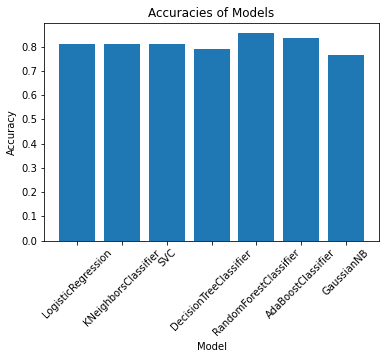

In [311]:
dense_features=train_features.toarray()
dense_test= test_features.toarray()
Accuracy=[]
Model=[]
for classifier in Classifiers:
    try:
        fit = classifier.fit(train_features,train['sent_code'])
        pred = fit.predict(test_features)
    except Exception:
        fit = classifier.fit(dense_features,train['sent_code'])
        pred = fit.predict(dense_test)
    accuracy = accuracy_score(pred,test['sent_code'])
    Accuracy.append(accuracy)
    Model.append(classifier.__class__.__name__)
    print('Accuracy of '+classifier.__class__.__name__+'is '+str(accuracy))    
    cf_matrix = confusion_matrix(test['sent_code'],pred)
    print(cf_matrix)
    precision = precision_score(test['sent_code'],pred)
    recall  =  recall_score(test['sent_code'],pred)
    f1 = f1_score(test['sent_code'],pred)
    print(precision,recall,f1)
    
Index = [1,2,3,4,5,6,7]
plt.bar(Index,Accuracy)
plt.xticks(Index, Model,rotation=45)
plt.ylabel('Accuracy')
plt.xlabel('Model')
plt.title('Accuracies of Models')

In [316]:
clf = RandomForestClassifier()
fit = clf.fit(train_features,train['sent_code'])
pred = fit.predict(test_features)
accuracy = accuracy_score(pred,test['sent_code'])
print('Accuracy of  is '+str(accuracy))    
cf_matrix = confusion_matrix(test['sent_code'],pred)
print(cf_matrix)
precision = precision_score(test['sent_code'],pred)
recall  =  recall_score(test['sent_code'],pred)
f1 = f1_score(test['sent_code'],pred)
print(precision,recall,f1)

test['pred_sent'] = pred
test.head(1)

Accuracy of  is 0.8419753086419753
[[313  15]
 [ 49  28]]
0.6511627906976745 0.36363636363636365 0.46666666666666673


C:\Users\kryzw\AppData\Local\Temp/ipykernel_34148/4110774046.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['pred_sent'] = pred


,text,Target,no_handles,remove_urls,clean_tweet,stemmed_tweet,lemmatizer_tweet,Tweet_length,sent_code,pred_sent
674,"@HSBC_UK when you walk into your bank as a business customer and find out you cant get change for your business you have to go to the local @PostOffice instead, whats the point in banking with you I might as well just open up a @PostOffice account!",0,"walk bank business customer find cant get change business go local instead, whats point banking might well open account!","walk bank business customer find cant get change business go local instead, whats point banking might well open account!",walk bank business customer find cant get change business go local instead whats point banking might well open account,walk bank busi custom find cant get chang busi go local instead what point bank might well open account,walk bank business customer find cant get change business go local instead whats point banking might well open account,23,0,0


[[313  15]
 [ 49  28]]
0.6511627906976745 0.36363636363636365 0.46666666666666673


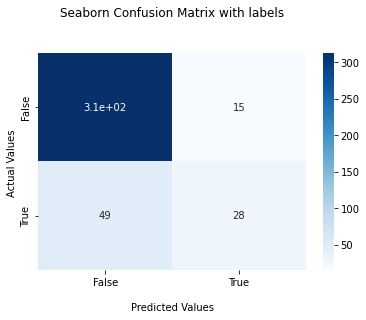

In [317]:
#confuision matrix
from sklearn.metrics import confusion_matrix

#Generate the confusion matrix
cf_matrix = confusion_matrix(test['sent_code'],pred)

print(cf_matrix)
precision = precision_score(test['sent_code'],pred)
recall  =  recall_score(test['sent_code'],pred)
f1 = f1_score(test['sent_code'],pred)
print(precision,recall,f1)

import seaborn as sns

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [318]:
test['sent_accuracy'] = np.where(test['sent_code']== test['pred_sent'], 1, 0)
df2 = test.groupby('sent_code').agg({'sent_code':['count'], 
                         'sent_accuracy':['sum']}).reset_index()

df2.columns = ['_'.join(col) for col in df2.columns.values]
df2 = df2.reset_index()
df2['accuracy']=df2['sent_accuracy_sum']/df2['sent_code_count']
df2

C:\Users\kryzw\AppData\Local\Temp/ipykernel_34148/1650602817.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['sent_accuracy'] = np.where(test['sent_code']== test['pred_sent'], 1, 0)


,index,sent_code_,sent_code_count,sent_accuracy_sum,accuracy
0,0,0,328,313,0.954268
1,1,1,77,28,0.363636


In [319]:
#this is the model we will use finally....
from joblib import dump, load
dump(clf, 'C:/Dev_And_Apps/Twitter_Extract_app/Trained_Models/sent_Model.joblib') 
dump(v, "C:/Dev_And_Apps/Twitter_Extract_app/Trained_Models/sentvectorizer.joblib")

['C:/Dev_And_Apps/Twitter_Extract_app/Trained_Models/sentvectorizer.joblib']

fORCED SAMPLE

['found revolut card last night destroy send back way instructions card thanks', 'digital banks like becoming popular customers choose manage money via app pros cons smallbusinessowners', 'customer service assistant based erdington click apply bankingjobs retailjobs brumjobs', 'metrobank pretty reliable good customer service phone', 'crao token cryptomining nodes rewards income crao token best investment presale date th february pm utc tg twitter bsc bscgem bnb p e craotoken']
Accuracy of LogisticRegressionis 0.7
[[35  4]
 [20 21]]
0.84 0.5121951219512195 0.6363636363636365
Accuracy of KNeighborsClassifieris 0.575
[[30  9]
 [25 16]]
0.64 0.3902439024390244 0.48484848484848486
Accuracy of SVCis 0.4875
[[39  0]
 [41  0]]
0.0 0.0 0.0
Accuracy of DecisionTreeClassifieris 0.6125
[[26 13]
 [18 23]]
0.6388888888888888 0.5609756097560976 0.5974025974025975


C:\Users\kryzw\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy of RandomForestClassifieris 0.7
[[32  7]
 [17 24]]
0.7741935483870968 0.5853658536585366 0.6666666666666666
Accuracy of AdaBoostClassifieris 0.7375
[[27 12]
 [ 9 32]]
0.7272727272727273 0.7804878048780488 0.7529411764705882
Accuracy of GaussianNBis 0.65
[[31  8]
 [20 21]]
0.7241379310344828 0.5121951219512195 0.6000000000000001


Text(0.5, 1.0, 'Accuracies of Models')

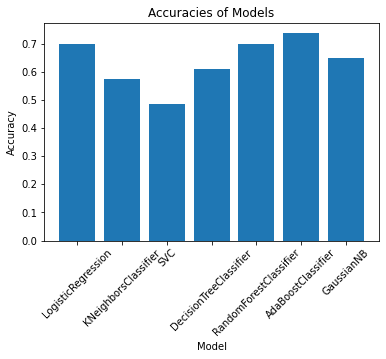

In [239]:
#try and force the sample
data_pos = df_clean[df_clean['sent_code']==1]
data_neg = df_clean[df_clean['sent_code']==0]
data_pos = data_pos.iloc[:int(400)]
data_neg = data_neg.iloc[:int(400)]
force_sample = pd.concat([data_pos, data_neg])

#stemmed _tweet model
train,test = train_test_split(force_sample,test_size=0.1,random_state=42)
train_clean_tweet=[]
for tweet in train['lemmatizer_tweet']:
    train_clean_tweet.append(tweet)
print(train_clean_tweet[0:5])
test_clean_tweet=[]
for tweet in test['lemmatizer_tweet']:
    test_clean_tweet.append(tweet)
    
v = CountVectorizer(analyzer = "word")
train_features= v.fit_transform(train_clean_tweet)
test_features=v.transform(test_clean_tweet)

dense_features=train_features.toarray()
dense_test= test_features.toarray()
Accuracy=[]
Model=[]
for classifier in Classifiers:
    try:
        fit = classifier.fit(train_features,train['sent_code'])
        pred = fit.predict(test_features)
    except Exception:
        fit = classifier.fit(dense_features,train['sent_code'])
        pred = fit.predict(dense_test)
    accuracy = accuracy_score(pred,test['sent_code'])
    Accuracy.append(accuracy)
    Model.append(classifier.__class__.__name__)
    print('Accuracy of '+classifier.__class__.__name__+'is '+str(accuracy))    
    cf_matrix = confusion_matrix(test['sent_code'],pred)
    print(cf_matrix)
    precision = precision_score(test['sent_code'],pred)
    recall  =  recall_score(test['sent_code'],pred)
    f1 = f1_score(test['sent_code'],pred)
    print(precision,recall,f1)
    
Index = [1,2,3,4,5,6,7]
plt.bar(Index,Accuracy)
plt.xticks(Index, Model,rotation=45)
plt.ylabel('Accuracy')
plt.xlabel('Model')
plt.title('Accuracies of Models')

In [194]:
#Fit the best model to data frame
#try and force the sample
data_pos = df_clean[df_clean['sent_code']==1]
data_neg = df_clean[df_clean['sent_code']==0]
data_pos = data_pos.iloc[:int(400)]
data_neg = data_neg.iloc[:int(400)]
force_sample = pd.concat([data_pos, data_neg])

#print(force_sample.head(1))
#stemmed _tweet model

train,test = train_test_split(force_sample,test_size=0.1,random_state=42)
train_clean_tweet=[]
for tweet in train['lemmatizer_tweet']:
    train_clean_tweet.append(tweet)
    
#print(train_clean_tweet[:1])

test_clean_tweet=[]
for tweet in test['lemmatizer_tweet']:
    test_clean_tweet.append(tweet)
    
v = CountVectorizer(analyzer = "word")
train_features= v.fit_transform(train_clean_tweet)
# print(train_features[0:2])

test_features=v.transform(test_clean_tweet)
# print(test_features[0:2])


clf = AdaBoostClassifier(random_state=0)
print(clf)
fit = clf.fit(train_features,train['sent_code'])
print(fit)
pred = fit.predict(test_features)
print(pred)
# accuracy = accuracy_score(pred,test['sent_code'])
# print(accuracy)
# recall  =  recall_score(test['sent_code'],pred)
# f1 = f1_score(test['sent_code'],pred)
# print(precision,recall,f1)

test['pred_sent'] = pred
test.head(1)

AdaBoostClassifier(random_state=0)
AdaBoostClassifier(random_state=0)
[0 0 1 1 1 0 1 0 0 1 1 0 0 0 0 1 0 1 0 0 0 1 1 0 1 1 1 1 0 0 1 0 0 1 1 1 0
 1 1 0 0 1 1 1 0 0 0 0 1 1 0 1 0 0 1 1 1 1 1 1 0 1 1 1 1 0 1 0 1 0 0 1 0 1
 1 1 1 0 1 0]


C:\Users\kryzw\AppData\Local\Temp/ipykernel_34148/929470151.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['pred_sent'] = pred


,text,Target,no_handles,remove_urls,clean_tweet,stemmed_tweet,lemmatizer_tweet,Tweet_length,sent_code,pred_sent
388,Then its the old bad customer service routine of deflection blaming the bank @HalifaxBank who after a 40 minutes call are just as bad with the deflection tactics of blaming @AsdaServiceTeam @asda https://t.co/wMaraDQPkH,0,old bad customer service routine deflection blaming bank 40 minutes call bad deflection tactics blaming https://t.co/wmaradqpkh,old bad customer service routine deflection blaming bank 40 minutes call bad deflection tactics blaming,old bad customer service routine deflection blaming bank minutes call bad deflection tactics blaming,old bad custom servic routin deflect blame bank minut call bad deflect tactic blame,old bad customer service routine deflection blaming bank minutes call bad deflection tactics blaming,20,0,0


In [217]:
#from sklearn.feature_extraction.text import CountVectorizer
# v = CountVectorizer(analyzer = "word")
# train_features= v.fit_transform(train_clean_tweet)
# test_features=v.transform(test_clean_tweet)

#stemmed _tweet model


test_clean_tweet=[]
for tweet in df_clean['lemmatizer_tweet']:
    test_clean_tweet.append(tweet)
    
print(test_clean_tweet[0:2])

print(v)

new_features=v.transform(test_clean_tweet)
print(new_features[0:1])

#words = v.fit_transform(new_features).toarray()

predict = clf.predict(new_features)
df_clean['sent_predict']=predict
df_clean.head(5)

['users grab shib go moon last chance', 'shibarmy never sleeps lfg']
CountVectorizer()
  (0, 402)	1
  (0, 1019)	1
  (0, 1035)	1
  (0, 1315)	1
  (0, 1527)	1
  (0, 2123)	1
  (0, 2530)	1


,text,Target,no_handles,remove_urls,clean_tweet,stemmed_tweet,lemmatizer_tweet,Tweet_length,sent_code,sent_predict
0,"To all @RevolutApp users, grab your $SHIB now before we go to the moon. Last chance https://t.co/NH5ovmWYrM",1,"users, grab $shib go moon. last chance https://t.co/nh5ovmwyrm","users, grab $shib go moon. last chance",users grab shib go moon last chance,user grab shib go moon last chanc,users grab shib go moon last chance,12,1,1
1,@GossipShib @RevolutApp @RobinhoodApp ShibArmy Never Sleeps LFG https://t.co/mBZCqtlm9w,1,shibarmy never sleeps lfg https://t.co/mbzcqtlm9w,shibarmy never sleeps lfg,shibarmy never sleeps lfg,shibarmi never sleep lfg,shibarmy never sleeps lfg,11,1,1
2,@monzo I think Im a bit late to the party https://t.co/Lm6IpxKAnb,0,think im bit late party https://t.co/lm6ipxkanb,think im bit late party,think im bit late party,think im bit late parti,think im bit late party,10,0,0
3,@GossipShib @RevolutApp Now i can add to my bag so easyyttt @RevolutApp https://t.co/lvTuKdShag,1,add bag easyyttt https://t.co/lvtukdshag,add bag easyyttt,add bag easyyttt,add bag easyyttt,add bag easyyttt,9,1,1
4,@HSBC_UK This is totally unbelievable two hours forty mins then cut off I need help this so stressful for something thats important. HSBC you have failed pull your finger out!!!! How do I get help from my Bank https://t.co/lJH00WOCQR,0,totally unbelievable two hours forty mins cut need help stressful something thats important. hsbc failed pull finger out!!!! get help bank https://t.co/ljh00wocqr,totally unbelievable two hours forty mins cut need help stressful something thats important. hsbc failed pull finger out!!!! get help bank,totally unbelievable two hours forty mins cut need help stressful something thats important hsbc failed pull finger get help bank,total unbeliev two hour forti min cut need help stress someth that import hsbc fail pull finger get help bank,totally unbelievable two hours forty mins cut need help stressful something thats important hsbc failed pull finger get help bank,26,0,0


In [216]:
from joblib import dump, load
dump(clf, 'C:/Dev_And_Apps/Twitter_Extract_app/Trained_Models/sent_Model.joblib') 
dump(v, "C:/Dev_And_Apps/Twitter_Extract_app/Trained_Models/sentvectorizer.joblib")

['C:/Dev_And_Apps/Twitter_Extract_app/Trained_Models/sentvectorizer.joblib']

[[27 12]
 [ 9 32]]
0.7272727272727273 0.7804878048780488 0.7529411764705882


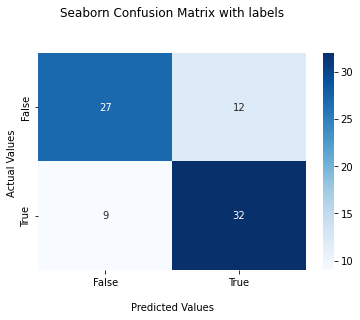

In [112]:
#print(train,test)

#confuision matrix
from sklearn.metrics import confusion_matrix

#Generate the confusion matrix
cf_matrix = confusion_matrix(test['sent_code'],pred)

print(cf_matrix)
precision = precision_score(test['sent_code'],pred)
recall  =  recall_score(test['sent_code'],pred)
f1 = f1_score(test['sent_code'],pred)
print(precision,recall,f1)

import seaborn as sns

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [113]:
test['sent_accuracy'] = np.where(test['sent_code']== test['pred_sent'], 1, 0)
df2 = test.groupby('sent_code').agg({'sent_code':['count'], 
                         'sent_accuracy':['sum']}).reset_index()

df2.columns = ['_'.join(col) for col in df2.columns.values]
df2 = df2.reset_index()
df2['accuracy']=df2['sent_accuracy_sum']/df2['sent_code_count']
df2

C:\Users\kryzw\AppData\Local\Temp/ipykernel_34148/1650602817.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['sent_accuracy'] = np.where(test['sent_code']== test['pred_sent'], 1, 0)


,index,sent_code_,sent_code_count,sent_accuracy_sum,accuracy
0,0,0,39,27,0.692308
1,1,1,41,32,0.780488


<AxesSubplot:>

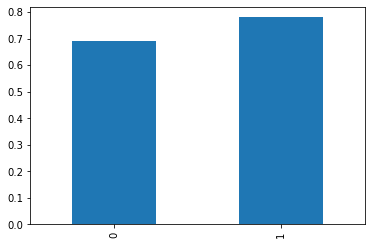

In [114]:
df2['accuracy'].plot(kind="bar")

In [ ]:
dense_features=train_features.toarray()
dense_test= test_features.toarray()
Accuracy=[]
Model=[]
for classifier in Classifiers:
    try:
        fit = classifier.fit(train_features,train['lab_code'])
        pred = fit.predict(test_features)
    except Exception:
        fit = classifier.fit(dense_features,train['lab_code'])
        pred = fit.predict(dense_test)
    accuracy = accuracy_score(pred,test['lab_code'])
    Accuracy.append(accuracy)
    Model.append(classifier.__class__.__name__)
    print('Accuracy of '+classifier.__class__.__name__+'is '+str(accuracy))    
    
Index = [1,2,3,4,5,6,7]
plt.bar(Index,Accuracy)
plt.xticks(Index, Model,rotation=45)
plt.ylabel('Accuracy')
plt.xlabel('Model')
plt.title('Accuracies of Models')

#Fit the best model to data frame

dense_features=train_features.toarray()
dense_test= test_features.toarray()
clf = RandomForestClassifier()
fit = clf.fit(train_features,train['lab_code'])
pred = fit.predict(test_features)
accuracy = accuracy_score(pred,test['lab_code'])
print(accuracy)

test['lab_sent'] = pred
test.head(40)

test['sent_accuracy'] = np.where(test['sent_code']== test['pred_sent'], 1, 0)
test['label_accuracy'] = np.where(test['lab_code']== test['lab_sent'], 1, 0)

df3 = test.groupby('label').agg({'label':['count'], 
                         'label_accuracy':['sum']}).reset_index()

df3.columns = ['_'.join(col) for col in df3.columns.values]
df3 = df3.reset_index()
df3['accuracy']=df3['label_accuracy_sum']/df3['label_count']
df3

#df3['accuracy'].plot(x='label',kind="bar")


lETS TRY AND BUILD A NEW MODEL THAT WORKS ON THE TWITTER SENTIMENT DATASET AND THEN FIT THAT TO MAIN DATASET

In [272]:
#build a new model on twitter sentiment dataset
DATASET_ENCODING = "ISO-8859-1"
DATASET_COLUMNS = ["target", "ids", "date", "flag", "user", "text"]
TRAIN_SIZE = 0.8

dft = pd.read_csv('C:/Dev_And_Apps/Twitter sentiment training dataset/archive/training.1600000.processed.noemoticon.csv', names=DATASET_COLUMNS,encoding =DATASET_ENCODING )
print(len(dft))
dft=dft.sample(frac=0.01)
print(len(dft))
# "C:/Dev_And_Apps/Twitter sentiment training dataset/archive/training.1600000.processed.noemoticon.csv"

1600000
16000


<class 'pandas.core.frame.DataFrame'>
Int64Index: 16000 entries, 1199528 to 962330
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   target  16000 non-null  int64 
 1   ids     16000 non-null  int64 
 2   date    16000 non-null  object
 3   flag    16000 non-null  object
 4   user    16000 non-null  object
 5   text    16000 non-null  object
dtypes: int64(2), object(4)
memory usage: 875.0+ KB


<AxesSubplot:title={'center':'Distribution of Tweet Sentiment in Labelled Data'}, xlabel='target', ylabel='# Tweets'>

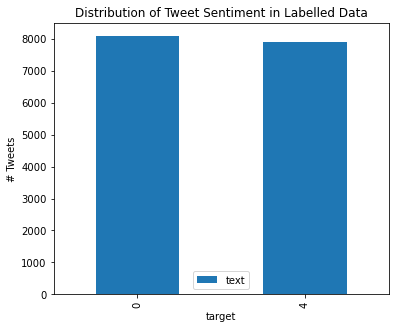

In [273]:
# general analysis of dataset
dft.info()
#DISTRIBUTION OF SENTIMENT
dfg = dft.groupby(dft['target']).count()
dfg.plot(kind='bar', title='Distribution of Tweet Sentiment in Labelled Data',y='text', ylabel='# Tweets',
         xlabel='target', figsize=(6, 5))

In [274]:
#Remove any rows with a "nan" in them
dft = dft.dropna(axis=0, how = 'any')

#Make it so that any non readable text gets converted into nothing
def removetext(text):
    return ''.join([i if ord(i) < 128 else '' for i in text])

#Here I am doing the actual removing
dft['text'] = dft['text'].apply(removetext)

In [275]:
# Import LabelEncoder
from sklearn import preprocessing
#creating labelEncoder
le = preprocessing.LabelEncoder()
# Converting string labels into numbers.
dft['sent_code']=le.fit_transform(dft['target'])

dft.head(5)

,target,ids,date,flag,user,text,sent_code
1199528,4,1985330596,Sun May 31 16:53:50 PDT 2009,NO_QUERY,iMaCrayon,Anyone no sum awsome songs? Dirct message/txt me,1
1081610,4,1968495158,Fri May 29 21:33:27 PDT 2009,NO_QUERY,ceejayrossi,drunk! eating peantu butter cookies,1
1130621,4,1975724734,Sat May 30 15:46:00 PDT 2009,NO_QUERY,Clewick,in an incredibly good mood.,1
528741,0,2195197542,Tue Jun 16 10:48:35 PDT 2009,NO_QUERY,anniejay23,Wants to go far far away from here. Anybody go any suggestions on where i can go???,0
1487552,4,2068312795,Sun Jun 07 13:52:10 PDT 2009,NO_QUERY,Sengupta,"@krist0ph3r At t-15, I usually have no more than 30% of the syllabus to go. I need my grades. @yuvipanda",1


In [276]:
#remove stop words
import re
import nltk
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

#remove @monzo etc
def clean_tweet_handles(raw_tweet):
    handles_only = re.sub(r"()@\w+",r"\1",raw_tweet)
    #print(handles_only)
    words = handles_only.lower().split()                             
    stops = set(stopwords.words("english"))                  
    meaningful_words = [w for w in words if not w in stops] 
    return( " ".join( meaningful_words )) 

#remove URLS
def remove_urls(raw_tweet):
    tweet = re.sub(r'(https|http)?:\/\/(\w|\.|\/|\?|\=|\&|\%)*\b', '', raw_tweet,flags=re.MULTILINE)
#     re.sub(r"http\S+|www\S+|https\S+", '', tweet, flags=re.MULTILINE
    #print(handles_only)
    words = tweet.lower().split()                             
    stops = set(stopwords.words("english"))                  
    meaningful_words = [w for w in words if not w in stops] 
    return( " ".join( meaningful_words )) 

def tweet_to_words(raw_tweet):
    letters_only = re.sub("[^a-zA-Z]", " ",raw_tweet) 
    words = letters_only.lower().split()                             
    stops = set(stopwords.words("english"))                  
    meaningful_words = [w for w in words if not w in stops] 
    return( " ".join( meaningful_words )) 

def stemming(raw_tweet):
    letters_only = re.sub("[^a-zA-Z]", " ",raw_tweet) 
    words = letters_only.lower().split()   
    stops = set(stopwords.words("english"))      
    ps = PorterStemmer()
    stemmed_words = [ps.stem(w) for w in words if not w in stops]
    return( " ".join( stemmed_words)) 
    
def lemmatizer(raw_tweet):
    letters_only = re.sub("[^a-zA-Z]", " ",raw_tweet) 
    words = letters_only.lower().split()   
    stops = set(stopwords.words("english"))      
#     ps = PorterStemmer()
#     stemmed_words = [ps.stem(w) for w in words if not w in stops]   
    lemmatizer = WordNetLemmatizer()
    lemma_words = [lemmatizer.lemmatize(w, pos='a') for w in words if not w in stops]
    return( " ".join( lemma_words)) 

#removing links

def clean_tweet_length(raw_tweet):
    letters_only = re.sub("[^a-zA-Z]", " ",raw_tweet) 
    words = letters_only.lower().split()                             
    stops = set(stopwords.words("english"))                  
    meaningful_words = [w for w in words if not w in stops] 
    return(len(meaningful_words)) 

dft_clean=dft
dft_clean['no_handles']=dft_clean['text'].apply(lambda x: clean_tweet_handles(x))
dft_clean['remove_urls']=dft_clean['no_handles'].apply(lambda x: remove_urls(x))
dft_clean['clean_tweet']=dft_clean['remove_urls'].apply(lambda x: tweet_to_words(x))
dft_clean['stemmed_tweet']=dft_clean['clean_tweet'].apply(lambda x: stemming(x))
dft_clean['lemmatizer_tweet']=dft_clean['clean_tweet'].apply(lambda x: lemmatizer(x))
dft_clean['Tweet_length']=dft_clean['text'].apply(lambda x: clean_tweet_length(x))

dft_clean.head(2)

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\kryzw\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,target,ids,date,flag,user,text,sent_code,no_handles,remove_urls,clean_tweet,stemmed_tweet,lemmatizer_tweet,Tweet_length
1199528,4,1985330596,Sun May 31 16:53:50 PDT 2009,NO_QUERY,iMaCrayon,Anyone no sum awsome songs? Dirct message/txt me,1,anyone sum awsome songs? dirct message/txt,anyone sum awsome songs? dirct message/txt,anyone sum awsome songs dirct message txt,anyon sum awsom song dirct messag txt,anyone sum awsome songs dirct message txt,7
1081610,4,1968495158,Fri May 29 21:33:27 PDT 2009,NO_QUERY,ceejayrossi,drunk! eating peantu butter cookies,1,drunk! eating peantu butter cookies,drunk! eating peantu butter cookies,drunk eating peantu butter cookies,drunk eat peantu butter cooki,drunk eating peantu butter cookies,5


In [277]:
train,test = train_test_split(dft_clean,test_size=0.2,random_state=42)
train_clean_tweet=[]
for tweet in train['lemmatizer_tweet']:
    train_clean_tweet.append(tweet)
test_clean_tweet=[]
for tweet in test['lemmatizer_tweet']:
    test_clean_tweet.append(tweet)
    
test_clean_tweet[0:10]

['potato salad shocking amount mustard remain hungry unsatisfied',
 'u know love p u send sunshine east coast days rain',
 'fall celebrity worship though write think best rock',
 'well whaddayaknow got lucky like yesterday sun shining way marathon gods really one',
 'hahaha keep theres always sum new cuz one hav jerk',
 'going calgary sunday evening see',
 'morning im england look curtains cloudy sunny cold looks like gonna rain',
 'happens songs even interlude amazing one ever mentions',
 'great time tonight live long amp prosper',
 'see see']

In [280]:
from sklearn.feature_extraction.text import CountVectorizer
v = CountVectorizer(analyzer = "word")
train_features= v.fit_transform(train_clean_tweet)
test_features=v.transform(test_clean_tweet)


In [281]:
Classifiers = [
    LogisticRegression(C=0.000000001,solver='liblinear',max_iter=400),
    KNeighborsClassifier(3),
    SVC(kernel="rbf", C=0.025, probability=True),
    DecisionTreeClassifier(),
    RandomForestClassifier(n_estimators=500),
    AdaBoostClassifier(),
    GaussianNB()]

Accuracy of LogisticRegressionis 0.574375
[[1527   82]
 [1280  311]]
0.7913486005089059 0.19547454431175362 0.31350806451612906
Accuracy of KNeighborsClassifieris 0.6
[[1135  474]
 [ 806  785]]
0.6235107227958697 0.49340037712130735 0.5508771929824561
Accuracy of SVCis 0.5721875
[[1365  244]
 [1125  466]]
0.6563380281690141 0.2928975487115022 0.4050412863972186
Accuracy of DecisionTreeClassifieris 0.648125
[[1010  599]
 [ 527 1064]]
0.639807576668671 0.6687617850408548 0.6539643515673018
Accuracy of RandomForestClassifieris 0.70125
[[1092  517]
 [ 439 1152]]
0.6902336728579987 0.7240729101194218 0.7067484662576687
Accuracy of AdaBoostClassifieris 0.6490625
[[ 666  943]
 [ 180 1411]]
0.5994052676295667 0.8868636077938403 0.7153358681875791
Accuracy of GaussianNBis 0.5753125
[[ 643  966]
 [ 393 1198]]
0.5536044362292052 0.7529855436832181 0.6380825565912116


Text(0.5, 1.0, 'Accuracies of Models')

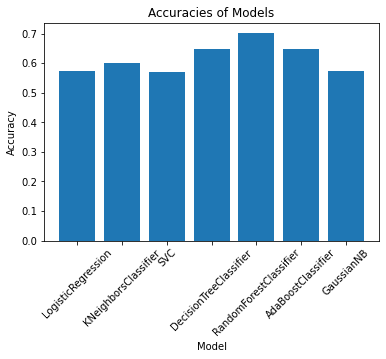

In [282]:
dense_features=train_features.toarray()
dense_test= test_features.toarray()
Accuracy=[]
Model=[]
for classifier in Classifiers:
    try:
        fit = classifier.fit(train_features,train['sent_code'])
        pred = fit.predict(test_features)
    except Exception:
        fit = classifier.fit(dense_features,train['sent_code'])
        pred = fit.predict(dense_test)
    accuracy = accuracy_score(pred,test['sent_code'])
    Accuracy.append(accuracy)
    Model.append(classifier.__class__.__name__)
    print('Accuracy of '+classifier.__class__.__name__+'is '+str(accuracy))    
    cf_matrix = confusion_matrix(test['sent_code'],pred)
    print(cf_matrix)
    precision = precision_score(test['sent_code'],pred)
    recall  =  recall_score(test['sent_code'],pred)
    f1 = f1_score(test['sent_code'],pred)
    print(precision,recall,f1)
    
Index = [1,2,3,4,5,6,7]
plt.bar(Index,Accuracy)
plt.xticks(Index, Model,rotation=45)
plt.ylabel('Accuracy')
plt.xlabel('Model')
plt.title('Accuracies of Models')

In [ ]:
 ###now lets use this model on the bank dataset
#first prepare the bank dataset

#Import labelled training data set
df = pd.read_csv('C:/Dev_And_Apps/Twitter_Extract_app/TrainingData/TRAINING3.csv')

#General data cleaning
#Remove any rows with a "nan" in them
df = df.dropna(axis=0, how = 'any')
#Make it so that any non readable text gets converted into nothing
def removetext(text):
    return ''.join([i if ord(i) < 128 else '' for i in text])
#Here I am doing the actual removing
df['text'] = df['text'].apply(removetext)
    
#remove stop words
import re
import nltk
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

#remove @monzo etc
def clean_tweet_handles(raw_tweet):
    handles_only = re.sub(r"()@\w+",r"\1",raw_tweet)
    #print(handles_only)
    words = handles_only.lower().split()                             
    stops = set(stopwords.words("english"))                  
    meaningful_words = [w for w in words if not w in stops] 
    return( " ".join( meaningful_words )) 

#remove URLS
def remove_urls(raw_tweet):
    tweet = re.sub(r'(https|http)?:\/\/(\w|\.|\/|\?|\=|\&|\%)*\b', '', raw_tweet,flags=re.MULTILINE)
#     re.sub(r"http\S+|www\S+|https\S+", '', tweet, flags=re.MULTILINE
    #print(handles_only)
    words = tweet.lower().split()                             
    stops = set(stopwords.words("english"))                  
    meaningful_words = [w for w in words if not w in stops] 
    return( " ".join( meaningful_words )) 

def tweet_to_words(raw_tweet):
    letters_only = re.sub("[^a-zA-Z]", " ",raw_tweet) 
    words = letters_only.lower().split()                             
    stops = set(stopwords.words("english"))                  
    meaningful_words = [w for w in words if not w in stops] 
    return( " ".join( meaningful_words )) 

def stemming(raw_tweet):
    letters_only = re.sub("[^a-zA-Z]", " ",raw_tweet) 
    words = letters_only.lower().split()   
    stops = set(stopwords.words("english"))      
    ps = PorterStemmer()
    stemmed_words = [ps.stem(w) for w in words if not w in stops]
    return( " ".join( stemmed_words)) 
    
def lemmatizer(raw_tweet):
    letters_only = re.sub("[^a-zA-Z]", " ",raw_tweet) 
    words = letters_only.lower().split()   
    stops = set(stopwords.words("english"))      
#     ps = PorterStemmer()
#     stemmed_words = [ps.stem(w) for w in words if not w in stops]   
    lemmatizer = WordNetLemmatizer()
    lemma_words = [lemmatizer.lemmatize(w, pos='a') for w in words if not w in stops]
    return( " ".join( lemma_words)) 

#removing links

def clean_tweet_length(raw_tweet):
    letters_only = re.sub("[^a-zA-Z]", " ",raw_tweet) 
    words = letters_only.lower().split()                             
    stops = set(stopwords.words("english"))                  
    meaningful_words = [w for w in words if not w in stops] 
    return(len(meaningful_words)) 

dfc=df
dfc['no_handles']=dfc['text'].apply(lambda x: clean_tweet_handles(x))
dfc['remove_urls']=dfc['no_handles'].apply(lambda x: remove_urls(x))
dfc['clean_tweet']=dfc['remove_urls'].apply(lambda x: tweet_to_words(x))
dfc['stemmed_tweet']=dfc['clean_tweet'].apply(lambda x: stemming(x))
dfc['lemmatizer_tweet']=dfc['clean_tweet'].apply(lambda x: lemmatizer(x))
dfc['Tweet_length']=dfc['text'].apply(lambda x: clean_tweet_length(x))
dfc.head(2)

#encoding the sentiment and label
# Import LabelEncoder
from sklearn import preprocessing
#creating labelEncoder
le = preprocessing.LabelEncoder()
# Converting string labels into numbers.
dfc['sent_code']=le.fit_transform(dfc['Target'])
#df['lab_code']=le.fit_transform(df['label'])
dfc.head(2)

#prediction
#stemmed _tweet model
# train,test = train_test_split(dfc,test_size=0.2,random_state=42)
# DFCtrain_clean_tweet=[]
# for tweet in train['lemmatizer_tweet']:
#     train_clean_tweet.append(tweet)
# test_clean_tweet=[]
# for tweet in test['lemmatizer_tweet']:
#     test_clean_tweet.append(tweet)
    
# test_clean_tweet[0:2]

# ######RUN the randofm forest on the twitter dataset
#     try:
#         fit = classifier.fit(train_features,train['sent_code'])
#         pred = fit.predict(test_features)
#     except Exception:
#         fit = classifier.fit(dense_features,train['sent_code'])
#         pred = fit.predict(dense_test)


# Accuracy of RandomForestClassifieris 0.70125
# [[1092  517]
#  [ 439 1152]]
# 0.6902336728579987 0.7240729101194218 0.7067484662576687
clf = RandomForestClassifier()
fit = clf.fit(train_features,train['sent_code'])
pred = fit.predict(test_features)
accuracy = accuracy_score(pred,test['sent_code'])
print('Accuracy of  is '+str(accuracy))    
cf_matrix = confusion_matrix(test['sent_code'],pred)
print(cf_matrix)
precision = precision_score(test['sent_code'],pred)
recall  =  recall_score(test['sent_code'],pred)
f1 = f1_score(test['sent_code'],pred)
print(precision,recall,f1)

In [293]:
###new model
dfctest_clean_tweet=[]
for tweet in dfc['lemmatizer_tweet']:
    dfctest_clean_tweet.append(tweet)
    
print(dfctest_clean_tweet[0:2])

new_features=v.transform(dfctest_clean_tweet)
print(new_features[0:1])

#words = v.fit_transform(new_features).toarray()

predict = clf.predict(new_features)
dfc['sent_predict2']=predict


contingency_matrix = pd.crosstab(dfc['sent_code'], df['sent_predict2'])
print(contingency_matrix)

dfc['sent_accuracy'] = np.where(dfc['sent_code']== dfc['sent_predict2'], 1, 0)
dfc2 = dfc.groupby('sent_code').agg({'sent_code':['count'], 
                         'sent_accuracy':['sum']}).reset_index()

dfc2.columns = ['_'.join(col) for col in dfc2.columns.values]
dfc2 = dfc2.reset_index()
dfc2['accuracy']=dfc2['sent_accuracy_sum']/dfc2['sent_code_count']
dfc2

['users grab shib go moon last chance', 'shibarmy never sleeps lfg']
  (0, 2132)	1
  (0, 5271)	1
  (0, 5363)	1
  (0, 7205)	1
  (0, 8347)	1
  (0, 13849)	1
sent_predict2    0    1
sent_code              
0              909  704
1              128  281


,index,sent_code_,sent_code_count,sent_accuracy_sum,accuracy
0,0,0,1613,909,0.563546
1,1,1,409,281,0.687042


In [287]:
dfc.head(20)

,text,Target,no_handles,remove_urls,clean_tweet,stemmed_tweet,lemmatizer_tweet,Tweet_length,sent_code,sent_predict2
0,"To all @RevolutApp users, grab your $SHIB now before we go to the moon. Last chance https://t.co/NH5ovmWYrM",1,"users, grab $shib go moon. last chance https://t.co/nh5ovmwyrm","users, grab $shib go moon. last chance",users grab shib go moon last chance,user grab shib go moon last chanc,users grab shib go moon last chance,12,1,1
1,@GossipShib @RevolutApp @RobinhoodApp ShibArmy Never Sleeps LFG https://t.co/mBZCqtlm9w,1,shibarmy never sleeps lfg https://t.co/mbzcqtlm9w,shibarmy never sleeps lfg,shibarmy never sleeps lfg,shibarmi never sleep lfg,shibarmy never sleeps lfg,11,1,0
2,@monzo I think Im a bit late to the party https://t.co/Lm6IpxKAnb,0,think im bit late party https://t.co/lm6ipxkanb,think im bit late party,think im bit late party,think im bit late parti,think im bit late party,10,0,1
3,@GossipShib @RevolutApp Now i can add to my bag so easyyttt @RevolutApp https://t.co/lvTuKdShag,1,add bag easyyttt https://t.co/lvtukdshag,add bag easyyttt,add bag easyyttt,add bag easyyttt,add bag easyyttt,9,1,1
4,@HSBC_UK This is totally unbelievable two hours forty mins then cut off I need help this so stressful for something thats important. HSBC you have failed pull your finger out!!!! How do I get help from my Bank https://t.co/lJH00WOCQR,0,totally unbelievable two hours forty mins cut need help stressful something thats important. hsbc failed pull finger out!!!! get help bank https://t.co/ljh00wocqr,totally unbelievable two hours forty mins cut need help stressful something thats important. hsbc failed pull finger out!!!! get help bank,totally unbelievable two hours forty mins cut need help stressful something thats important hsbc failed pull finger get help bank,total unbeliev two hour forti min cut need help stress someth that import hsbc fail pull finger get help bank,totally unbelievable two hours forty mins cut need help stressful something thats important hsbc failed pull finger get help bank,26,0,0
5,@DuncanGray @RevolutApp Did any of the free #SHIB promotions pan out?,0,free #shib promotions pan out?,free #shib promotions pan out?,free shib promotions pan,free shib promot pan,free shib promotions pan,6,0,1
6,@HSBC_UK HSBC came bottom in a Which survey for accessibility for Disabled people. Being forced to go into the bank and beg for your own money or permission to spend it on something you want is a disgrace. https://t.co/DQuCavVhV8,0,hsbc came bottom survey accessibility disabled people. forced go bank beg money permission spend something want disgrace. https://t.co/dqucavvhv8,hsbc came bottom survey accessibility disabled people. forced go bank beg money permission spend something want disgrace.,hsbc came bottom survey accessibility disabled people forced go bank beg money permission spend something want disgrace,hsbc came bottom survey access disabl peopl forc go bank beg money permiss spend someth want disgrac,hsbc came bottom survey accessibility disabled people forced go bank beg money permission spend something want disgrace,22,0,0
7,@DavidDo28846484 @monzo No one falls for this shit.,0,one falls shit.,one falls shit.,one falls shit,one fall shit,one falls shit,5,0,0
8,"@WaqasMunami @shibainuart @RevolutApp There is a lot to burn, it is a very daunting task. NASA didn't sign a few papers and put people on the moon in a year. It took a lot of effort from a lot of different people and a lot of tests. \nIf we had t...",0,"lot burn, daunting task. nasa sign papers put people moon year. took lot effort lot different people lot tests. current capability burn trillions, shib affordable.","lot burn, daunting task. nasa sign papers put people moon year. took lot effort lot different people lot tests. current capability burn trillions, shib affordable.",lot burn daunting task nasa sign papers put people moon year took lot effort lot different people lot tests current capability burn trillions shib affordable

In [294]:
df_wrong= np.where(dfc['sent_code'] != dfc['sent_predict2'])

In [297]:
df_wrong

(array([   1,    2,    5,   11,   14,   16,   23,   34,   36,   37,   39,
          41,   42,   45,   46,   48,   49,   52,   57,   59,   60,   61,
          67,   71,   75,   76,   77,   78,   79,   81,   82,   83,   91,
          92,   93,  100,  102,  103,  105,  107,  118,  122,  124,  128,
         141,  143,  144,  146,  147,  148,  154,  155,  156,  159,  166,
         167,  170,  172,  173,  176,  178,  179,  181,  183,  184,  186,
         190,  191,  192,  194,  197,  200,  201,  203,  204,  210,  211,
         212,  213,  215,  219,  223,  225,  226,  228,  229,  230,  231,
         233,  236,  237,  238,  239,  244,  249,  250,  252,  254,  255,
         259,  260,  261,  263,  266,  267,  268,  269,  272,  276,  277,
         278,  281,  283,  285,  286,  289,  290,  291,  292,  296,  297,
         298,  300,  301,  303,  304,  305,  306,  308,  310,  311,  312,
         316,  320,  321,  322,  324,  325,  330,  331,  332,  333,  334,
         338,  343,  349,  351,  352, 